In [67]:
import numpy as np
import pandas as pd 
import random
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

class MarkovModel:
    def __init__(self, C_n, C_r, C_f, p_n, p_r):
        self.C_n = C_n  
        self.C_r = C_r  
        self.C_f = C_f  
        self.p_n = p_n  
        self.p_r = p_r  
        self.N = 2  
        self.gamma = 0.97
        self.epsilon = 1e-8

    def value_iteration(self):
        # Initialize value function for each state
        V = np.zeros(self.N)

        while True:
            prev_V = np.copy(V)
            delta = 0
            for i in range(self.N):
                v_i = V[i]
                #calculating expected value
                Q_values = [self.expected_value(i, action, V) for action in range(2)]
                V[i] = min(Q_values)  
                delta = max(delta, abs(v_i - V[i]))
            if delta < self.epsilon:
                break
        return V

    def expected_value(self, state, action, V):
        #calculating expected value
        #if in functional state, is just normal device cost
        if state == 0:  
            cost = self.C_n if action == 0 else self.C_r
            p_failure = self.p_n if action == 0 else self.p_r
            expected_value = cost + self.gamma * (p_failure * V[1] + (1 - p_failure) * V[0])
        #if in non-functional state, need to add failure penalty cost
        else:  
            cost = self.C_n + self.C_f if action == 0 else self.C_r + self.C_f
            p_failure = self.p_n if action == 0 else self.p_r
            expected_value = cost + self.gamma * (p_failure * V[1] + (1 - p_failure) * V[0])
        return expected_value

#C_n, C_r, C_f, p_n, p_r

In [68]:
m2 = MarkovModel(120, 119.10, 1000000, 0.0000001, 0.000001)

#value iteration
values = m2.value_iteration()

#PRINT STATEMENTS FOR TESTING & ANALYZING DATA
print("Optimal values:", values)

#select the optimal policy based on values
for state in range(2):
    print(f"STATE {state}:")
    for action in range(2):
        action_name = "new" if action == 0 else "reprocessed"
        expected_val = m2.expected_value(state, action, values)
        print(f"Action {action_name}: Expected cost = {expected_val}")

optimal_policy = ['new' if m2.expected_value(0, action, values) == min([m2.expected_value(0, a, values) for a in range(2)]) else 'reprocessed' for action in range(2)]

print("Optimal policy:"", ",optimal_policy)

Optimal values: [   4002.33333301 1004002.33333302]
STATE 0:
Action new: Expected cost = 4002.360333019982
Action reprocessed: Expected cost = 4002.3333330199816
STATE 1:
Action new: Expected cost = 1004002.36033302
Action reprocessed: Expected cost = 1004002.33333302
Optimal policy:,  ['reprocessed', 'new']


In [118]:
## CHANGING C_N

y_vals = []

for c_n in range(110,130):
    # print(c_n)
    m2 = MarkovModel(c_n, 119.09, 1000000, 0.0000001, 0.000001)
    values = m2.value_iteration()
    # print(values)
    # y_vals.append(values[0])
    # print([m2.expected_value(0, action, values) for action in range(2)])
    expected = [m2.expected_value(0, action, values) for action in range(2)]
    y_vals.append(abs(expected[0]-expected[1]))
    # print("Optimal policy:"", ",optimal_policy)
    

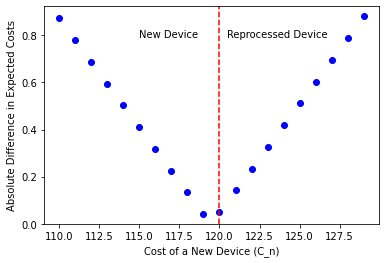

In [135]:
x1 = list(range(110, 130))

# Create a scatter plot
plt.scatter(x1, y_vals, marker='o', color='blue')

# Add labels and a title
plt.xlabel('Cost of a New Device (C_n)')
plt.ylabel('Absolute Difference in Expected Costs')
# plt.title('Scatter Plot of c_n vs. Optimal Value')

# Add a line to separate the regions
plt.axvline(x=119.97, color='red', linestyle='--', label='Policy Change')

# Add text annotations
plt.text(115, max(y_vals) * 0.9, 'New Device', color='black', fontsize=10)
plt.text(120.5, max(y_vals) * 0.9, 'Reprocessed Device', color='black', fontsize=10)


# Show the plot
# plt.grid(True)  # Add a grid (optional)
plt.show()

110.1
111.1
112.1
113.1
114.1
115.1
116.1
117.1
118.1
119.1
120.1
121.1
122.1
123.1
124.1
125.1
126.1
127.1
128.1
129.1


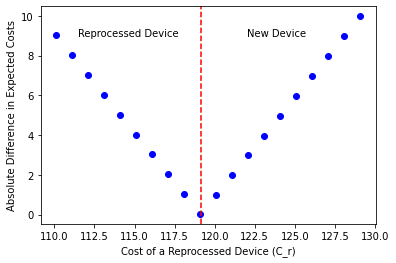

In [136]:
# CHANGING C_R 
y_vals = []

for c_r in np.arange(110.10,130.10,1):
    print(c_r)
    m2 = MarkovModel(120, c_r, 1000000, 0.0000001, 0.000001)
    values = m2.value_iteration()
    # print(values)
    # y_vals.append(values[0])
    # print([m2.expected_value(0, action, values) for action in range(2)])
    expected = [m2.expected_value(0, action, values) for action in range(2)]
    y_vals.append(abs(expected[0]-expected[1]))
    # print("Optimal policy:"", ",optimal_policy)
    
x1 = list(np.arange(110.10, 130.10, 1))

# Create a scatter plot
plt.scatter(x1, y_vals, marker='o', color='blue')

# Add labels and a title
plt.xlabel('Cost of a Reprocessed Device (C_r)')
plt.ylabel('Absolute Difference in Expected Costs')
# plt.title('Scatter Plot of c_n vs. Optimal Value')

# Add a line to separate the regions
plt.axvline(x= 119.13, color='red', linestyle='--', label='Policy Change')

# Add text annotations
plt.text(111.5, max(y_vals) * 0.9, 'Reprocessed Device', color='black', fontsize=10)
plt.text(122, max(y_vals) * 0.9, 'New Device', color='black', fontsize=10)


# Show the plot
# plt.grid(True)  # Add a grid (optional)
plt.show()

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000


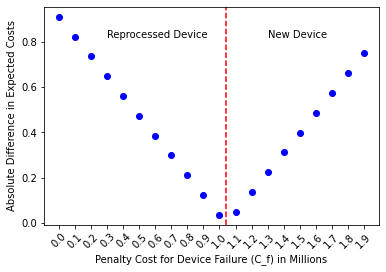

In [137]:
# CHANGING C_F 
import numpy as np
import matplotlib.pyplot as plt

# Your code for generating y_vals
y_vals = []

for c_f in np.arange(0, 2000000, 100000):
    print(c_f)
    m2 = MarkovModel(120, 119.09, c_f, 0.0000001, 0.000001)
    values = m2.value_iteration()
    expected = [m2.expected_value(0, action, values) for action in range(2)]
    y_vals.append(abs(expected[0] - expected[1]))

x2 = list(np.arange(0, 2, 0.1))

# Create a scatter plot
plt.scatter(x2, y_vals, marker='o', color='blue')

# Add labels and a title
plt.xlabel('Penalty Cost for Device Failure (C_f) in Millions')
plt.ylabel('Absolute Difference in Expected Costs')

# Add a line to separate the regions
plt.axvline(x=1.042382, color='red', linestyle='--', label='Policy Change')

# Add text annotations
plt.text(0.3, max(y_vals) * 0.9, 'Reprocessed Device', color='black', fontsize=10)
plt.text(1.3, max(y_vals) * 0.9, 'New Device', color='black', fontsize=10)

x_ticks = list(np.arange(0,2,0.1))
plt.xticks(x_ticks, rotation=45)
# plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))

# Show the plot
plt.show()


1e-08
1.55e-08
2.1e-08
2.65e-08
3.1999999999999995e-08
3.75e-08
4.3e-08
4.849999999999999e-08
5.3999999999999994e-08
5.95e-08
6.5e-08
7.049999999999999e-08
7.599999999999999e-08
8.15e-08
8.699999999999998e-08
9.249999999999999e-08
9.799999999999999e-08
1.035e-07
1.09e-07
1.1449999999999999e-07


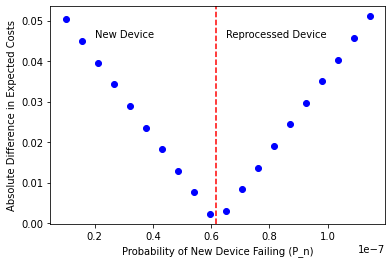

In [139]:
# CHANGING P_n
y_vals = []

for p_n in np.arange(0.00000001, 0.00000012, 0.0000000055):
    print(p_n)
    m2 = MarkovModel(120, 119.09, 1000000, p_n, 0.000001)
    values = m2.value_iteration()
    expected = [m2.expected_value(0, action, values) for action in range(2)]
    y_vals.append(abs(expected[0] - expected[1]))

x2 = np.arange(0.00000001, 0.00000012, 0.0000000055)

# Create a scatter plot
plt.scatter(x2, y_vals, marker='o', color='blue')

# Add labels and a title
plt.xlabel('Probability of New Device Failing (P_n)')
plt.ylabel('Absolute Difference in Expected Costs')

# Add a line to separate the regions
plt.axvline(x=0.618*(10**(-7)), color='red', linestyle='--', label='Policy Change')

# Add text annotations
plt.text(0.2*(10**(-7)), max(y_vals) * 0.9, 'New Device', color='black', fontsize=10)
plt.text(0.65*(10**(-7)), max(y_vals) * 0.9, 'Reprocessed Device', color='black', fontsize=10)

# Show the plot
plt.show()

In [96]:
start_value = 0.00000001
end_value = 0.00000012
num_points = 20
print((end_value-start_value)/20)

5.5e-09


1.1449999999999999e-07
1.1449999999999999e-07
1.1449999999999999e-07
1.1449999999999999e-07
1.1449999999999999e-07
1.1449999999999999e-07
1.1449999999999999e-07
1.1449999999999999e-07
1.1449999999999999e-07
1.1449999999999999e-07
1.1449999999999999e-07
1.1449999999999999e-07
1.1449999999999999e-07
1.1449999999999999e-07
1.1449999999999999e-07
1.1449999999999999e-07
1.1449999999999999e-07
1.1449999999999999e-07
1.1449999999999999e-07
1.1449999999999999e-07


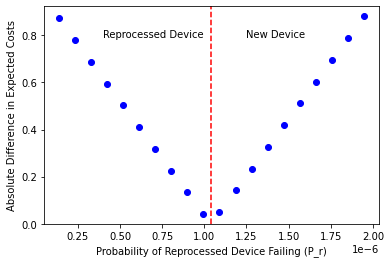

In [141]:
# CHANGING P_r
y_vals = []

for p_r in np.arange(0.00000014,0.00000204, 9.5e-08):
    print(p_n)
    m2 = MarkovModel(120, 119.09, 1000000, 0.0000001, p_r)
    values = m2.value_iteration()
    expected = [m2.expected_value(0, action, values) for action in range(2)]
    y_vals.append(abs(expected[0] - expected[1]))

x2 = np.arange(0.00000014,0.00000204, 9.5e-08)

# Create a scatter plot
plt.scatter(x2, y_vals, marker='o', color='blue')

# Add labels and a title
plt.xlabel('Probability of Reprocessed Device Failing (P_r)')
plt.ylabel('Absolute Difference in Expected Costs')

# Add a line to separate the regions
plt.axvline(x=0.00000104, color='red', linestyle='--', label='Policy Change')

# Add text annotations
plt.text(0.4*(10**(-6)), max(y_vals) * 0.9, 'Reprocessed Device', color='black', fontsize=10)
plt.text(1.25*(10**(-6)),max(y_vals) * 0.9, 'New Device', color='black', fontsize=10)

# Show the plot
plt.show()

In [115]:
start_value = 0.00000014
end_value = 0.00000204
num_points = 20
print((end_value-start_value)/20)

9.5e-08


In [114]:
center_value = 0.00000104
step_size = 0.0000001
num_values = 20

values = np.linspace(center_value - (step_size * 9), center_value + (step_size * 10), num_values)
print(values)


[1.40e-07 2.40e-07 3.40e-07 4.40e-07 5.40e-07 6.40e-07 7.40e-07 8.40e-07
 9.40e-07 1.04e-06 1.14e-06 1.24e-06 1.34e-06 1.44e-06 1.54e-06 1.64e-06
 1.74e-06 1.84e-06 1.94e-06 2.04e-06]
